In [2]:
# The function generateINandTARGETOUT generates the inputs and target outputs for training a recurrent neural network (RNN) on a simple task that requires memory.
# In this task the RNN receives some random constant input (let's call this number C) for a few timesteps at the beginning of the trial and then must remember this input for the rest of the trial.
# The RNN demonstrates that it has remembered the input by outputting the number C for the entire trial, even after the input returns to zero.

import numpy as np# https://stackoverflow.com/questions/11788950/importing-numpy-into-functions
import torch

In [3]:
##############################################################################
#%% generate input and target output
'''
def generateINandTARGETOUT_original(dim_input=1, dim_output=1, numT=50, numtrials=100):
    #---------------------------------------------
    #                 INPUTS
    #---------------------------------------------
    # dim_input:  number of input units
    # dim_output: number of output units
    # numT:       number of timesteps in a trial
    # numtrials:  number of trials 
    
    #---------------------------------------------
    #                OUTPUTS
    #---------------------------------------------
    # IN:        numtrials x numT x dim_input tensor
    # TARGETOUT: numtrials x numT x dim_output tensor
    #---------------------------------------------
    IN = np.zeros((numtrials,numT,dim_input))
    TARGETOUT = np.zeros((numtrials,numT,dim_output))
    constant = np.random.randn(numtrials)# on each trial the RNN is supposed to remember a different constant
    for itrial in range(0,numtrials):# 0, 1, 2, ... numtrials-1
        IN[itrial,0:10,0] = constant[itrial]# the constant is presented as an input to the RNN for the first 10 timesteps of the trial
        TARGETOUT[itrial,:,0] = constant[itrial]# the RNN outputs
        
    # convert to pytorch tensors 
    dtype = torch.float32
    #IN = torch.from_numpy(IN, dtype=dtype); TARGETOUT = torch.from_numpy(TARGETOUT, dtype=dtype); 
    IN = torch.tensor(IN, dtype=dtype); TARGETOUT = torch.tensor(TARGETOUT, dtype=dtype); 
    return IN, TARGETOUT
'''

'\ndef generateINandTARGETOUT_original(dim_input=1, dim_output=1, numT=50, numtrials=100):\n    #---------------------------------------------\n    #                 INPUTS\n    #---------------------------------------------\n    # dim_input:  number of input units\n    # dim_output: number of output units\n    # numT:       number of timesteps in a trial\n    # numtrials:  number of trials \n    \n    #---------------------------------------------\n    #                OUTPUTS\n    #---------------------------------------------\n    # IN:        numtrials x numT x dim_input tensor\n    # TARGETOUT: numtrials x numT x dim_output tensor\n    #---------------------------------------------\n    IN = np.zeros((numtrials,numT,dim_input))\n    TARGETOUT = np.zeros((numtrials,numT,dim_output))\n    constant = np.random.randn(numtrials)# on each trial the RNN is supposed to remember a different constant\n    for itrial in range(0,numtrials):# 0, 1, 2, ... numtrials-1\n        IN[itrial,0:10,0]

In [4]:
##############################################################################
#%% generate input and target output
def generateINandTARGETOUT(dim_input=1, dim_output=2, numT=50, numtrials=100):
    #---------------------------------------------
    #                 INPUTS
    #---------------------------------------------
    # dim_input:  number of input units
    # dim_output: number of output units
    # numT:       number of timesteps in a trial
    # numtrials:  number of trials 
    
    #---------------------------------------------
    #                OUTPUTS
    #---------------------------------------------
    # IN:        numtrials x numT x dim_input tensor
    # TARGETOUT: numtrials x numT x dim_output tensor
    #---------------------------------------------
    IN = np.zeros((numtrials,numT,dim_input))
    TARGETOUT = np.zeros((numtrials,numT,dim_output))
    
    dt = 2.5
    momentum = 0.8 ## 0.8
    sigma = 0.03 # 0.03
    X = np.random.normal(0.0, 1.0, size=(numtrials, numT))
    
    for itrial in range(0,numtrials):# 0, 1, 2, ... numtrials-1
        
        # Set initial conditions
        IN[itrial, 0, 0] = np.random.random()
        TARGETOUT[itrial, 0, :] = [np.sin(np.pi/3), np.cos(np.pi/3)]
        
        for timestep in range(1, numT):
            
            IN[itrial,timestep,0] = IN[itrial,timestep-1,0]*momentum + sigma*X[itrial, timestep]
            
            if timestep < 3:
                TARGETOUT[itrial, timestep, :] = [np.sin(np.pi/3), np.cos(np.pi/3)]
                
            else:

                prevOUT = TARGETOUT[itrial,timestep-1,:]

                prevOUT_R = np.arctan2(prevOUT[0], prevOUT[1])    
                nextOUT_R = prevOUT_R + IN[itrial, timestep, 0]*dt

                # test if connectivity like in the paper shows up in different sorts of architecture .. e.g. LSTM/GRU .. suspicious it wouldnt show up there
                # use LSTM with 100 Neurons exactly like continuous time RNN 
                # use LSTM with equal capacity (same amoutn of weights) as CT-RNN
                # if those two LSTMs dont have same result => result worth presenting

                # "firing rate" for LSTM is the last layer right before the classifier
                # maybe plot gating parameters out of interest

                # Use cos/sin to make sure 359-0 doesnt have a huge impact .. need both to resolve ambiguity
                nextOUT = [np.sin(nextOUT_R), np.cos(nextOUT_R)]

                TARGETOUT[itrial,timestep,:] = nextOUT # the RNN outputs
        
    # convert to pytorch tensors 
    dtype = torch.float32
    #IN = torch.from_numpy(IN, dtype=dtype); TARGETOUT = torch.from_numpy(TARGETOUT, dtype=dtype); 
    IN = torch.tensor(IN, dtype=dtype); TARGETOUT = torch.tensor(TARGETOUT, dtype=dtype); 
    return IN, TARGETOUT

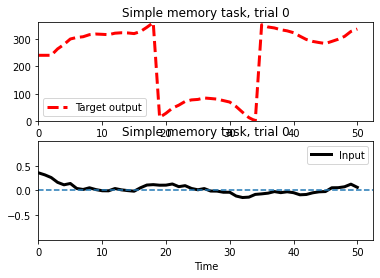

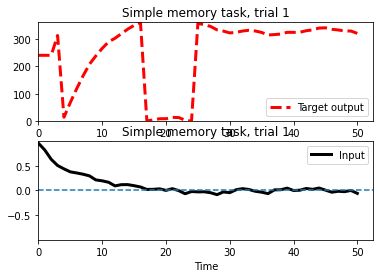

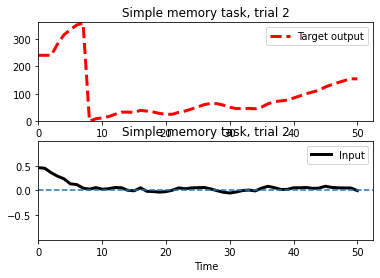

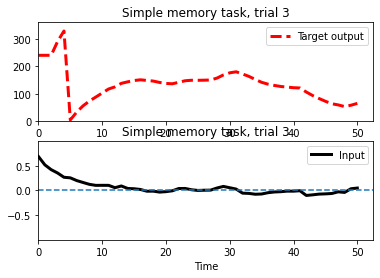

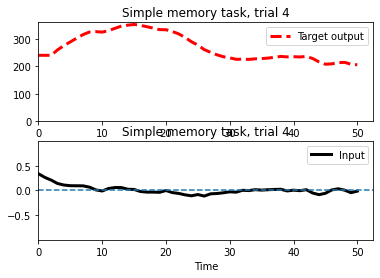

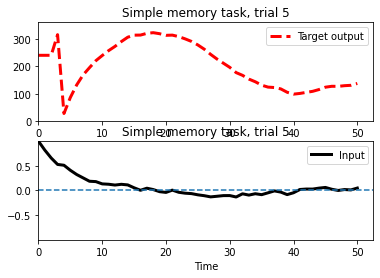

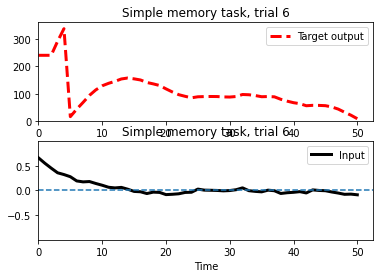

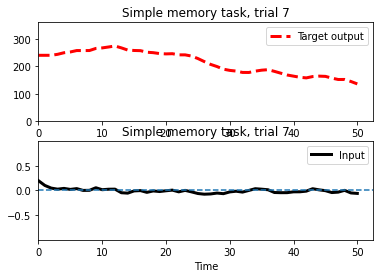

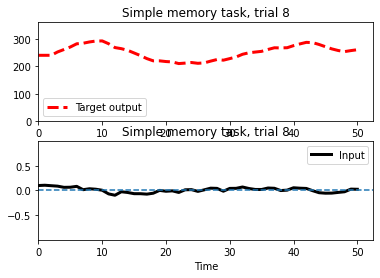

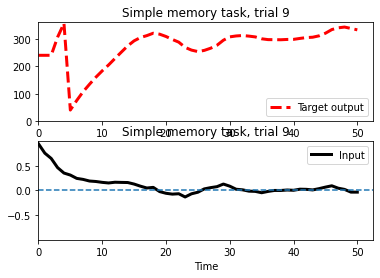

In [5]:
##############################################################################
#%%                     test generateINandTARGETOUT
##############################################################################
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from matplotlib import cm
    
    np.random.seed(123); torch.manual_seed(123)# set random seed for reproducible results
    numT = 51
    T = np.arange(0,numT)# (numT,)
    
    dim_input = 1
    dim_output = 2
    numtrials = 10
    IN, TARGETOUT = generateINandTARGETOUT(dim_input=dim_input, dim_output=dim_output, numT=numT, numtrials=numtrials)
    
    fig = plt.figure()# inputs and target outputs 
    for itrial in range(numtrials):
        plt.subplot(2, 1, 1)
        OUT_D = np.degrees(np.arctan2(TARGETOUT[itrial,:,0], TARGETOUT[itrial,:,1]))+180
        plt.plot(T, OUT_D, 'r--', linewidth=3, label='Target output')# target output
        plt.legend(loc='best')
        plt.xlabel('Time')
        plt.title(f'Simple memory task, trial {itrial}')
        plt.xlim(left=0)
        plt.ylim(0, 360)
        # plt.show()
        
        plt.subplot(2, 1, 2)
        plt.plot(T, IN[itrial,:,0], 'k-', linewidth=3, label='Input')# input
        #plt.plot(T, TARGETOUT[itrial,:,:], 'r--', linewidth=3, label='Target output')# target output
        plt.axhline(0, linestyle='--')
        plt.legend(loc='best')
        plt.xlabel('Time')
        plt.title(f'Simple memory task, trial {itrial}')
        plt.xlim(left=0)
        plt.ylim(torch.min(TARGETOUT), torch.max(TARGETOUT))
        plt.show()
        
        #input("Press Enter to continue...")# pause the program until the user presses Enter
        #fig.clf()

In [16]:
##############################################################################
#%% generate input and target output
def generateTuningCurveINOUT(AV_val, dim_input=1, dim_output=2, numT=50, numtrials=100):
    #---------------------------------------------
    #                 INPUTS
    #---------------------------------------------
    # dim_input:  number of input units
    # dim_output: number of output units
    # numT:       number of timesteps in a trial
    # numtrials:  number of trials 
    
    #---------------------------------------------
    #                OUTPUTS
    #---------------------------------------------
    # IN:        numtrials x numT x dim_input tensor
    # TARGETOUT: numtrials x numT x dim_output tensor
    #---------------------------------------------
    IN = np.zeros((numtrials,numT,dim_input))
    TARGETOUT = np.zeros((numtrials,numT,dim_output))
    
    dt = 2.5
    momentum = 0.8
    sigma = 0.03
    X = np.random.normal(0.0, 1.0, size=(numtrials, numT))
    
    for itrial in range(0,numtrials):# 0, 1, 2, ... numtrials-1
        
        # Set initial conditions
        
        # Only input is predefined AV_val
        IN[itrial, 0, 0] = AV_val
        
        # TARGETOUT goes from -pi to pi
        init_OUT_R = -np.pi
        TARGETOUT[itrial, 0, :] = [np.sin(init_OUT_R), np.cos(init_OUT_R)]
        
        for timestep in range(1, numT):
            
            IN[itrial,timestep,0] = IN[itrial,timestep-1,0]
            
            prevOUT = TARGETOUT[itrial,timestep-1,:]
            prevOUT_R = np.arctan2(prevOUT[0], prevOUT[1]) 
            
            nextOUT_R = prevOUT_R + 2*np.pi/(numT-1)
            
            nextOUT = [np.sin(nextOUT_R), np.cos(nextOUT_R)]
            
            TARGETOUT[itrial,timestep,:] = nextOUT # the RNN outputs
        
    # convert to pytorch tensors 
    dtype = torch.float32
    #IN = torch.from_numpy(IN, dtype=dtype); TARGETOUT = torch.from_numpy(TARGETOUT, dtype=dtype); 
    IN = torch.tensor(IN, dtype=dtype); TARGETOUT = torch.tensor(TARGETOUT, dtype=dtype); 
    return IN, TARGETOUT